In [1]:
import bioregistry
from bioregistry.compare import get_keys, make_overlaps
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
keys = get_keys()
overlaps = make_overlaps(keys)

In [11]:
rows_1 = []
rows_2 = []
for metaprefix, data in overlaps.items():
    br = data["x"]
    external= data["y"]
    rows_1.append((
        bioregistry.get_registry_short_name(metaprefix),
        len(external - br),
        len(br.intersection(external)),
        len(br - external),
    ))
    rows_2.append((
        bioregistry.get_registry_short_name(metaprefix),
        len(external - br),
        len(br.intersection(external)),
    ))
rows_1 = sorted(rows_1, key=lambda row: sum(row[1:]), reverse=True)
rows_2 = sorted(rows_2, key=lambda row: sum(row[1:]), reverse=True)

df1 = pd.DataFrame(rows_1, columns=["metaprefix", "external_only", "intersection", "bioregistry_only"])
df1.set_index("metaprefix", inplace=True)

df2 = pd.DataFrame(rows_2, columns=["metaprefix", "external_only", "intersection"])
df2.set_index("metaprefix", inplace=True)

df1.head()

,external_only,intersection,bioregistry_only
metaprefix,,,
BioPortal,673,309,1029
FAIRSharing,544,241,1097
Wikidata,190,42,1288
GO,122,139,1199
Prefix Commons,120,833,504


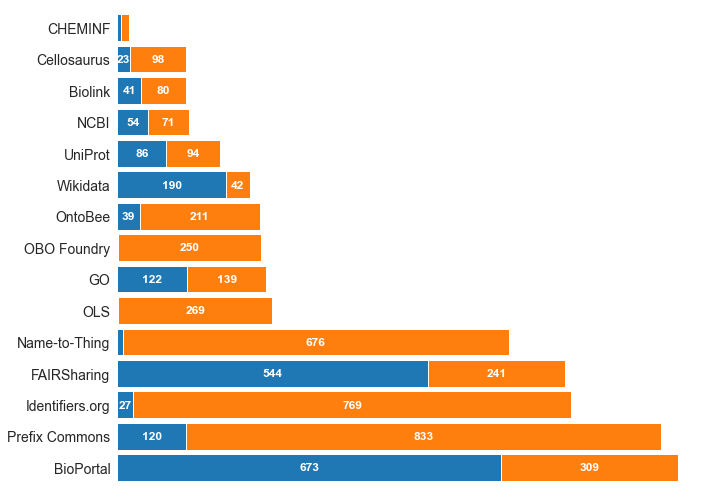

In [15]:
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("white")
fix, ax = plt.subplots(1,1, figsize=(10, 7))
df2.plot(
    kind='barh', 
    stacked=True, 
    # color=['green', 'goldenrod', 'blue'],
    ax=ax,
    width=.85,
    fontsize=14,
)
# ax.set_xscale("log")
ax.set_ylabel("")
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if width < 20:
        continue
    ax.text(
        x+width/2, 
        y+height/2, 
        f"{int(width):,}", 
        horizontalalignment='center', 
        verticalalignment='center',
        fontdict=dict(weight="bold", color="white", fontsize=12)
)
ax.get_legend().remove()
plt.tight_layout()
plt.savefig("/Users/cthoyt/Desktop/comparison_no_br.png", dpi=300)

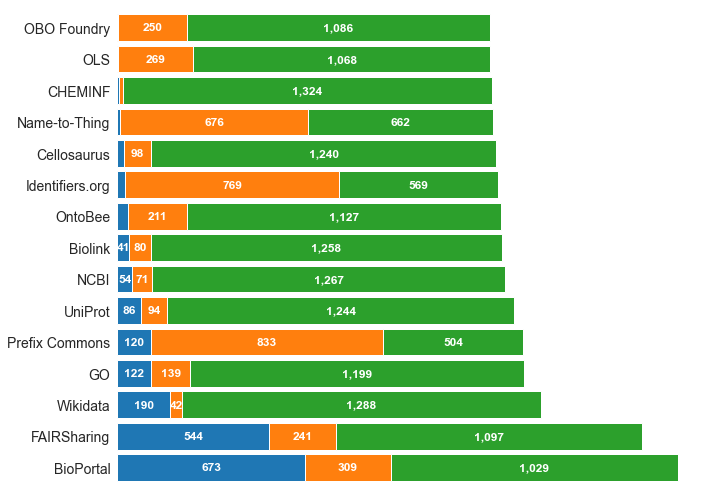

In [16]:
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("white")
fix, ax = plt.subplots(1,1, figsize=(10, 7))
df1.plot(
    kind='barh', 
    stacked=True, 
    # color=['green', 'goldenrod', 'blue'],
    ax=ax,
    width=.85,
    fontsize=14,
)
# ax.set_xscale("log")
ax.set_ylabel("")
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if width < 40:
        continue
    ax.text(
        x+width/2, 
        y+height/2, 
        f"{int(width):,}", 
        horizontalalignment='center', 
        verticalalignment='center',
        fontdict=dict(weight="bold", color="white", fontsize=12)
)
ax.get_legend().remove()
plt.tight_layout()
plt.savefig("/Users/cthoyt/Desktop/comparison.png", dpi=300)